In [22]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
import seaborn as sns

# EXPLORATORY DATA ANALYSIS

EDA là quá trình hiểu và khám phá dữ liệu.

Bây giờ ta sẽ thực hiện EDA với bộ dữ liệu là Disaster Tweet.

## 1. Sơ lược về dữ liệu

In [23]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')

In [24]:
df_train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [25]:
df_test.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [26]:
print('Kích thước tập train:',df_train.shape)
print('Kích thước tập test:', df_test.shape)

Kích thước tập train: (7613, 5)
Kích thước tập test: (3263, 4)


**Ý nghĩa các cột:**
- `id` : mã định danh cho mỗi tweet
- `text` : nội dung của tweet
- `location` : địa điểm gửi tweet (có thể trống)
- `keyword` : từ khóa cụ thể của mỗi tweet (có thể trống)
- `target` : chỉ có trong file train, trả lời 1 tweet có nói về thiên tai, thảm họa thật hay không: (0) là không, (1) là có.


## 2. Xem xét phân bố dữ liệu

### 2.1 Dữ liệu thiếu

In [27]:
print("Dữ liệu thiếu trong các cột thuộc tập train:")
print(df_train.isna().sum())
print()
print("Dữ liệu thiếu trong các cột thuộc tập test:")
print(df_test.isna().sum())

Dữ liệu thiếu trong các cột thuộc tập train:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

Dữ liệu thiếu trong các cột thuộc tập test:
id             0
keyword       26
location    1105
text           0
dtype: int64


**NHẬN XÉT:** Có 2 cột bị thiếu dữ liệu trong tập train và tập test là: `keyword`, `location`.

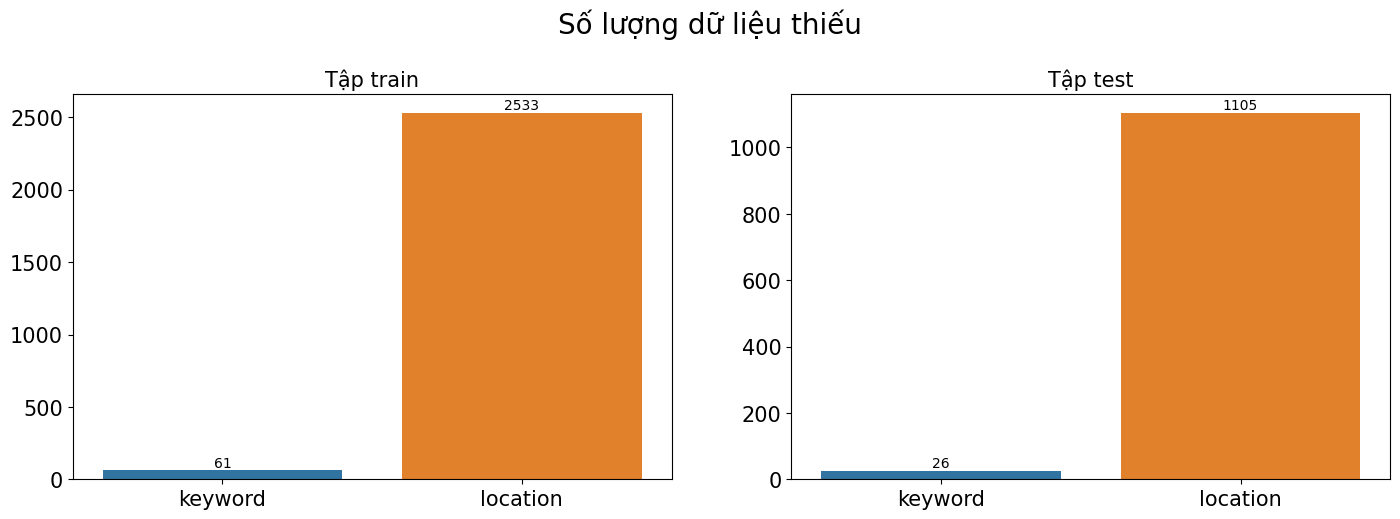

In [28]:
# 2 cột bị thiếu dữ liệu là keyword và location
missing_cols = ['keyword', 'location']

# Số lượng dữ liệu thiếu trong tập train
missing_train = df_train[missing_cols].isnull().sum()

# Số lượng dữ liệu thiếu trong tập test
missing_test = df_test[missing_cols].isnull().sum()

# Vẽ biểu đồ
fig, axes = plt.subplots(ncols=2,figsize = (17,5))
fig.suptitle('Số lượng dữ liệu thiếu', fontsize=20, y=1.05)

sns.barplot(x=missing_train.index, y=missing_train.values, ax=axes[0])
sns.barplot(x=missing_test.index, y=missing_test.values, ax=axes[1])

axes[0].tick_params(axis='x', labelsize=15)
axes[0].tick_params(axis='y', labelsize=15)
axes[1].tick_params(axis='x', labelsize=15)
axes[1].tick_params(axis='y', labelsize=15)

axes[0].set_title('Tập train', fontsize=15)
axes[1].set_title('Tập test', fontsize=15)
#------------

# Hiển thị số liệu cho từng cột
for i in range(len(missing_train)):
    axes[0].text(i, missing_train[i], str(missing_train[i]), ha='center', va='bottom')

for i in range(len(missing_test)):
    axes[1].text(i, missing_test[i], str(missing_test[i]), ha='center', va='bottom')
    
plt.show()

In [29]:
print('Tỉ lệ dữ liệu thiếu trong tập train:'),
for i in range(len(missing_cols)):
    print('- {}: {:.3f}%'.format(missing_train.index[i],missing_train[i]/df_train.shape[0]*100))

print('Tỉ lệ dữ liệu thiếu trong tập test:'),
for i in range(len(missing_cols)):
    print('- {}: {:.3f}%'.format(missing_test.index[i],missing_test[i]/df_test.shape[0]*100))

Tỉ lệ dữ liệu thiếu trong tập train:
- keyword: 0.801%
- location: 33.272%
Tỉ lệ dữ liệu thiếu trong tập test:
- keyword: 0.797%
- location: 33.865%


**NHẬN XÉT:** Cả tập train và tập test đều có cùng tỷ lệ dữ liệu thiếu trong `keyword` và `position`.

### 2.2. Xem xét target của các dữ liệu thiếu

In [30]:
missing_train_df_keyword_mask = df_train.isna()["keyword"]
missing_train_df_keyword = df_train[missing_train_df_keyword_mask]
missing_train_df_location_mask = df_train.isna()["location"]
missing_train_df_location = df_train[missing_train_df_location_mask]

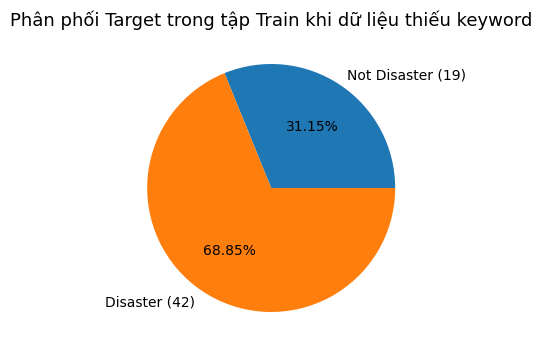

In [67]:
fig = plt.figure(figsize=(4, 10))

# Biểu đồ tròn với số liệu phần trăm
target_counts = missing_train_df_keyword['target'].value_counts()
target_percentages = target_counts / target_counts.sum() * 100

missing_train_df_keyword['target'].value_counts().sort_index().plot(kind='pie', labels=['Not Disaster ({})'.format(target_counts[0]), 'Disaster ({})'.format(target_counts[1])],
                                       autopct=lambda p: '{:.2f}%'.format(p))

plt.axis('off')
plt.title('Phân phối Target trong tập Train khi dữ liệu thiếu keyword', fontsize=13);
plt.show()

**NHẬN XÉT:** Khi thiếu dữ liệu location có xu hướng là có thảm họa xảy ra thật. 

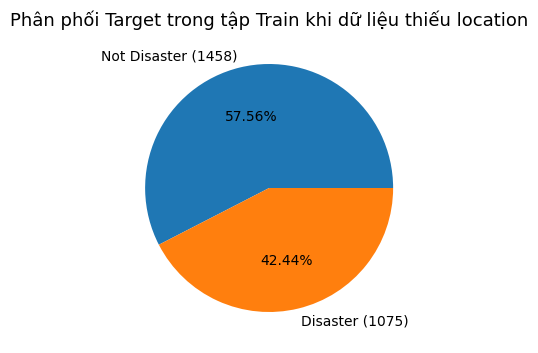

In [64]:
fig = plt.figure(figsize=(4, 10))

# Biểu đồ tròn với số liệu phần trăm
target_counts = missing_train_df_location['target'].value_counts()
target_percentages = target_counts / target_counts.sum() * 100

missing_train_df_location['target'].value_counts().plot(kind='pie', labels=['Not Disaster ({})'.format(target_counts[0]), 'Disaster ({})'.format(target_counts[1])],
                                       autopct=lambda p: '{:.2f}%'.format(p))

plt.axis('off')
plt.title('Phân phối Target trong tập Train khi dữ liệu thiếu location', fontsize=13);
plt.show()

**NHẬN XÉT:** Khi thiếu dữ liệu location thì có xu hướng thảm họa không xảy ra nhiều hơn.

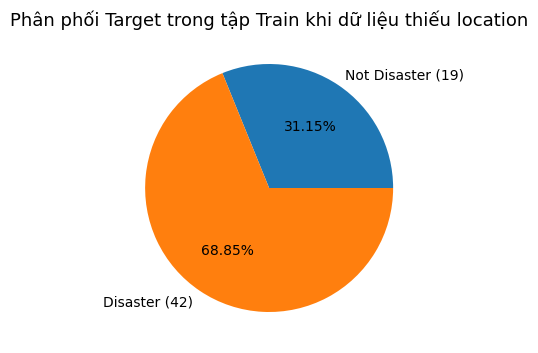

In [65]:
missing_train_df = df_train[df_train.isna()["keyword"] & df_train.isna()["location"]]
fig = plt.figure(figsize=(4, 10))

# Biểu đồ tròn với số liệu phần trăm
target_counts = missing_train_df['target'].value_counts().sort_index()
target_percentages = target_counts / target_counts.sum() * 100

missing_train_df['target'].value_counts().sort_index().plot(kind='pie', labels=['Not Disaster ({})'.format(target_counts[0]), 'Disaster ({})'.format(target_counts[1])],
                                       autopct=lambda p: '{:.2f}%'.format(p))

plt.axis('off')
plt.title('Phân phối Target trong tập Train khi dữ liệu thiếu location', fontsize=13);
plt.show()

**NHẬN XÉT:** 
- Khi thiếu cả 2 thì có xu hướng xảy ra thảm họa thật nhiều hơn. 
- Đồng thời, phân phối này giống với thiếu keyword => Có thể thấy, khi thiếu `keyword` sẽ thiếu luôn cả `location`.
- Có thể thấy dữ liệu thiếu của keyword khá ít, và không cho ra 1 kết luận cụ thể, nên sẽ xóa dữ liệu thiếu của keyword trong phần tiền xử lí.

### 2.3. Xét phân phối của target

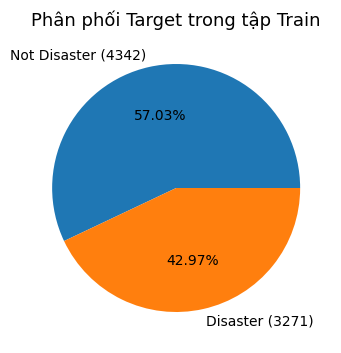

In [34]:
fig = plt.figure(figsize=(4, 10))

# Biểu đồ tròn với số liệu phần trăm
target_counts = df_train['target'].value_counts()
target_percentages = target_counts / target_counts.sum() * 100

df_train['target'].value_counts().plot(kind='pie', labels=['Not Disaster ({})'.format(target_counts[0]), 'Disaster ({})'.format(target_counts[1])],
                                       autopct=lambda p: '{:.2f}%'.format(p))

plt.axis('off')
plt.title('Phân phối Target trong tập Train', fontsize=13);
plt.show()

**NHẬN XÉT:** Dữ liệu không bị mất cân bằng.

### 2.4. Xét phân bố độ dài của tweet

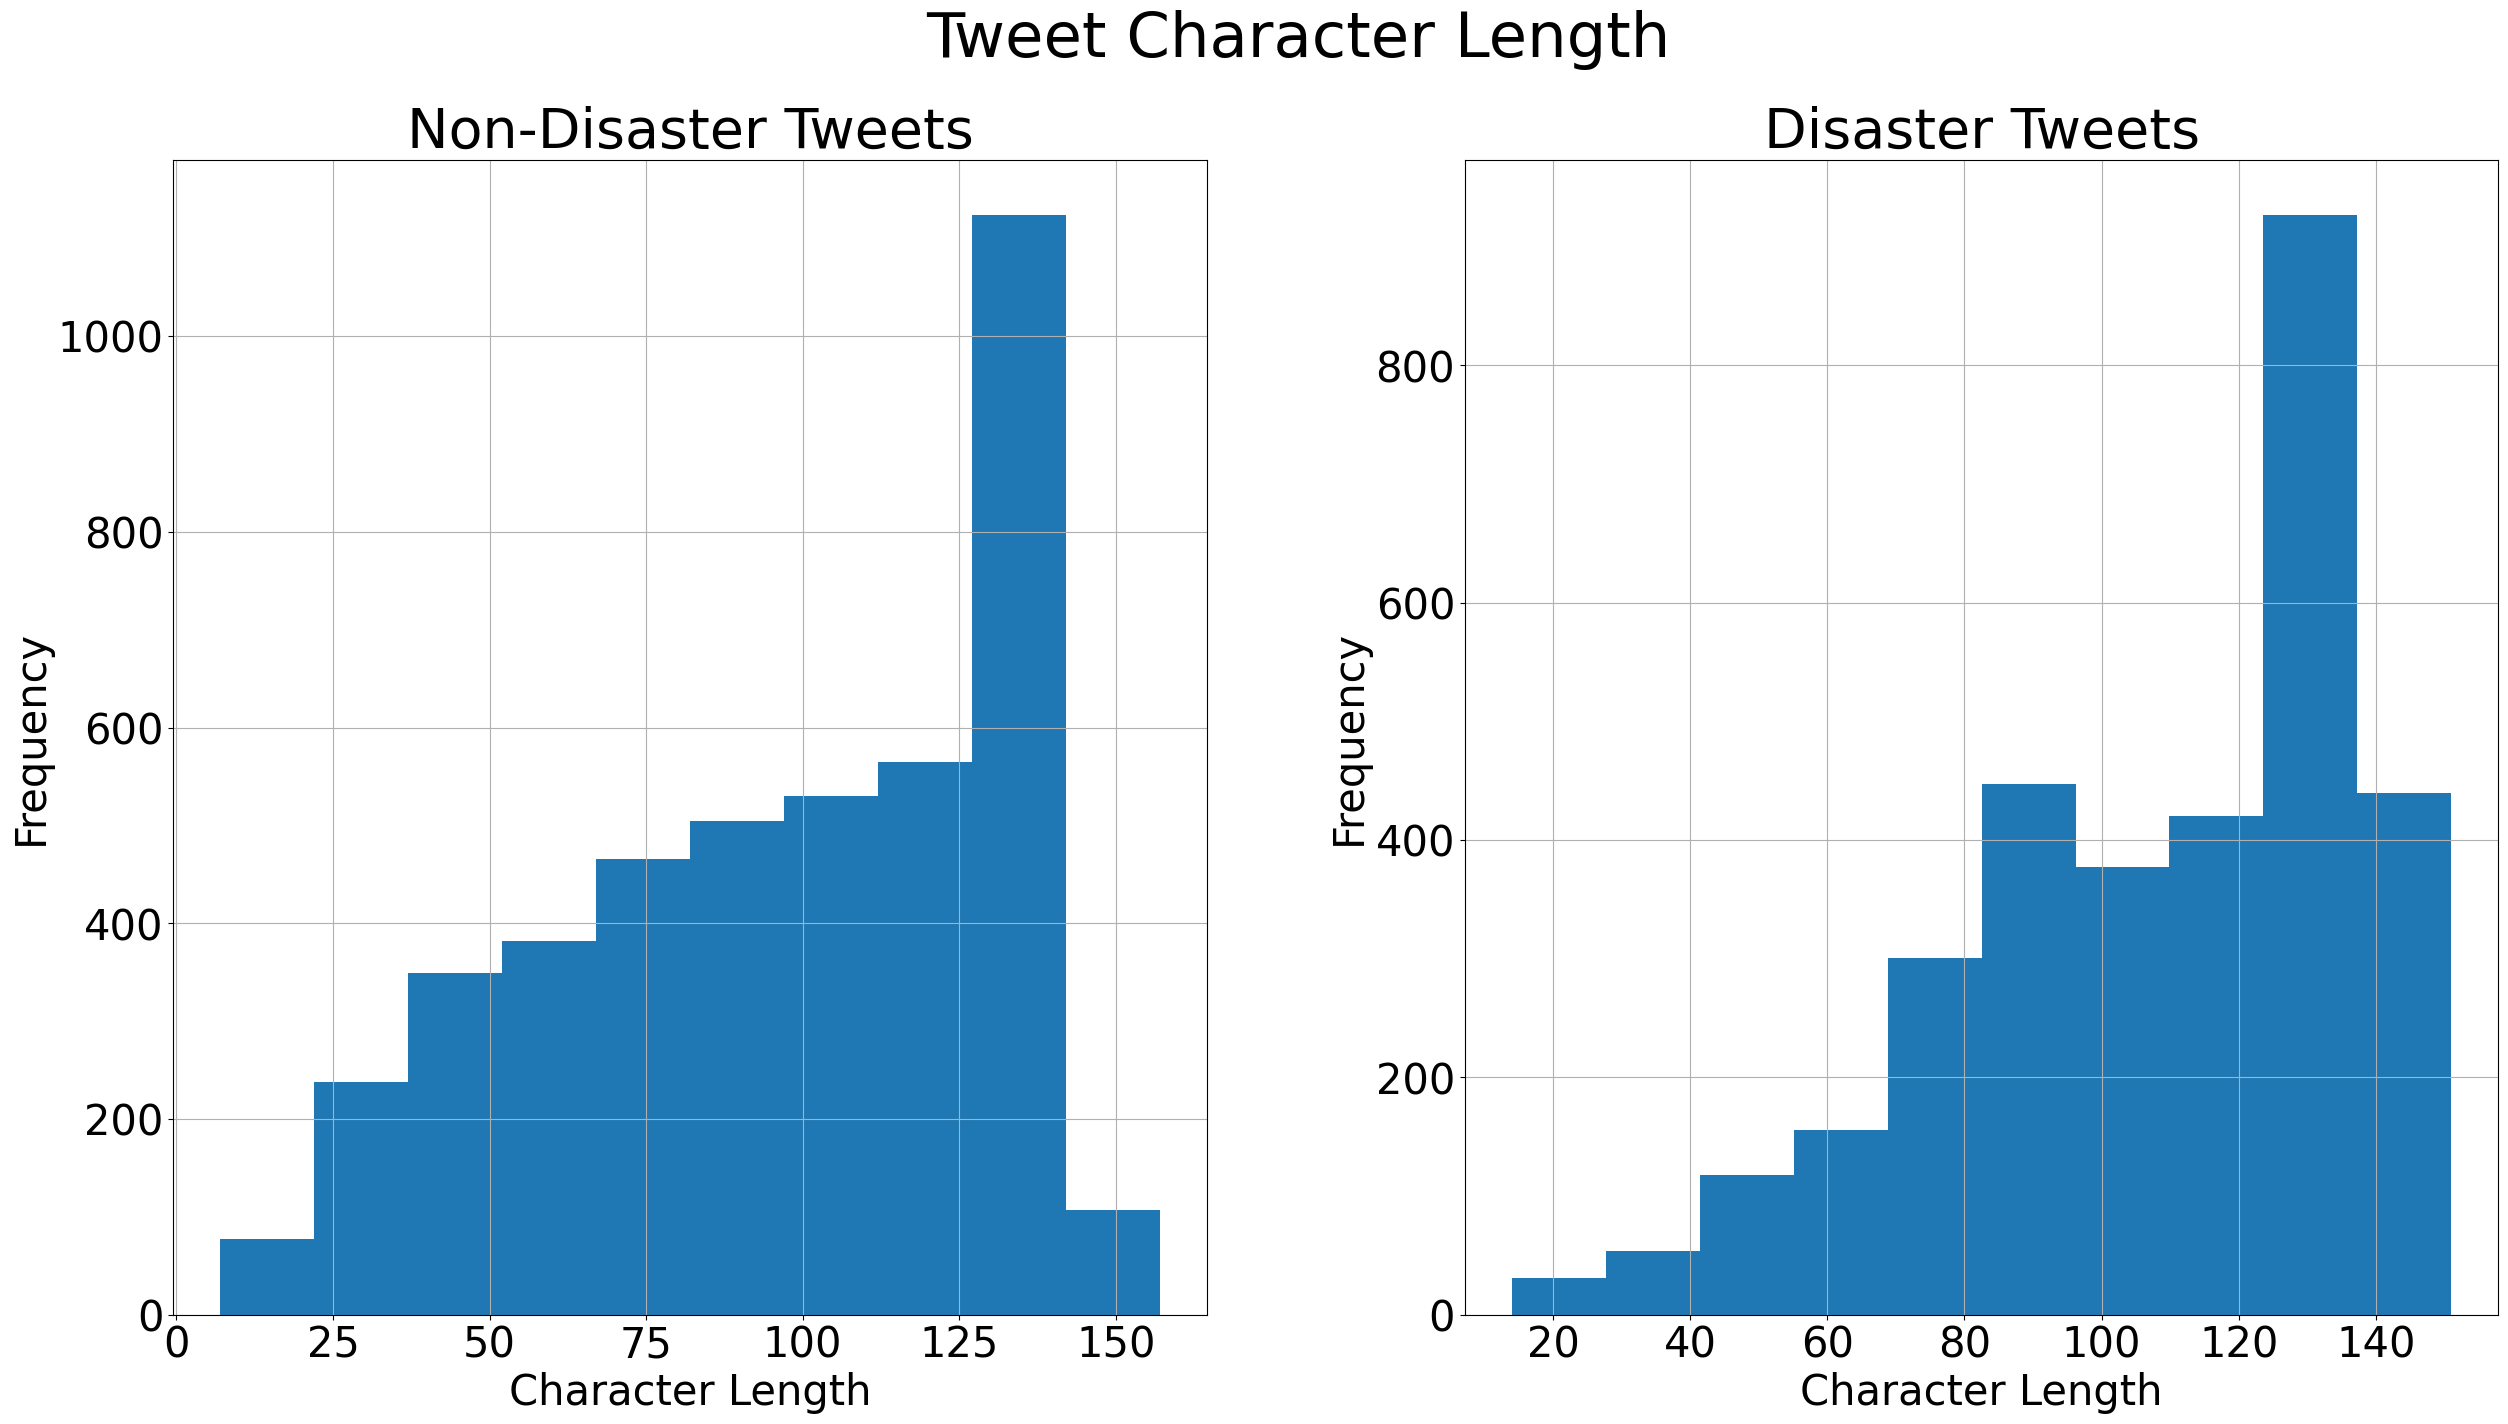

In [35]:
fig, axes = plt.subplots(1, 2, figsize = (30, 15))
fig.suptitle('Tweet Character Length', fontsize = 45)


# axes[0].set_facecolor('black')
df_train[df_train["target"]==0]['text'].str.len().hist(ax =axes[0])
axes[0].set_title('Non-Disaster Tweets', fontsize = 40)
axes[0].set_xlabel('Character Length', fontsize = 30)
axes[0].set_ylabel('Frequency', fontsize = 30)
axes[0].xaxis.set_tick_params(labelsize = 30)
axes[0].yaxis.set_tick_params(labelsize = 30)

# axes[1].set_facecolor('black')
# axes[1].hist(disaster_tweets_length, color = custom_colors[2], edgecolor = 'white', linewidth = 4)
df_train[df_train["target"]==1]['text'].str.len().hist(ax =axes[1])
axes[1].set_title('Disaster Tweets', fontsize = 40)
axes[1].set_xlabel('Character Length', fontsize = 30)
axes[1].set_ylabel('Frequency', fontsize = 30)
axes[1].xaxis.set_tick_params(labelsize = 30)
axes[1].yaxis.set_tick_params(labelsize = 30)

plt.subplots_adjust(wspace = 0.25, hspace = 0.1)
plt.show()

**NHẬN XÉT:**
- Có thể thấy độ dài của những câu có target là 0 và 1 phân bố tương đối giống nhau.
- Điều này có nghĩa là 1 câu ngắn hay dài không ảnh hưởng tới kết quả của target.

### 2.5. Phân bố Location

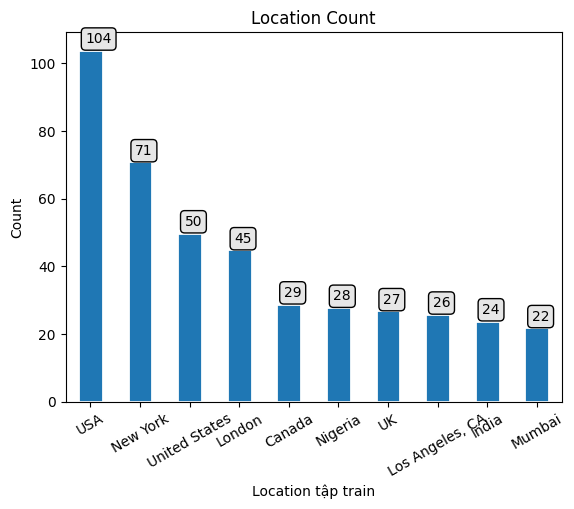

In [36]:
ax = plt.axes()
ax = ((df_train.location.value_counts())[:10]).plot(kind = 'bar', linewidth = 2, edgecolor = 'white')
plt.title('Location Count')
plt.xlabel('Location tập train')
plt.ylabel('Count')
ax.xaxis.set_tick_params(rotation = 30)
ax.yaxis.set_tick_params()
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 2),
                   bbox = bbox_args)
        
plt.show()

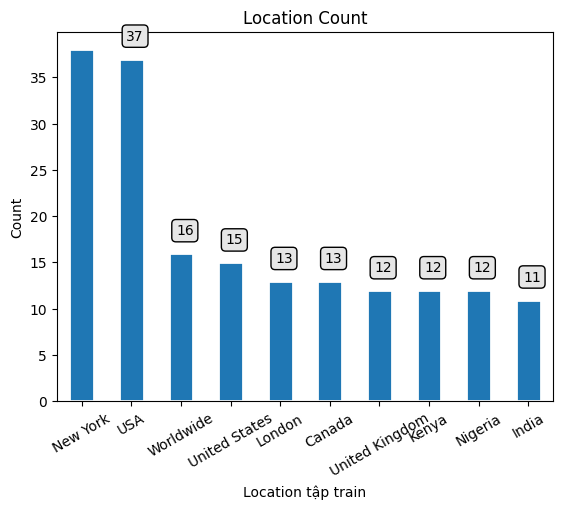

In [37]:
ax = plt.axes()
ax = (df_test.location.value_counts()[:10]).plot(kind = 'bar', linewidth = 2, edgecolor = 'white')
plt.title('Location Count')
plt.xlabel('Location tập train')
plt.ylabel('Count')
ax.xaxis.set_tick_params(rotation = 30)
ax.yaxis.set_tick_params()
bbox_args = dict(boxstyle = 'round', fc = '0.9')
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + 0.15, p.get_height() + 2),
                   bbox = bbox_args)
        
plt.show()

In [38]:
print("Dữ liệu có giá trị trong location thuộc tập train:", (~df_train["location"].isna()).sum())
print()
print("Dữ liệu có giá trị trong location thuộc tập test:", (~df_test["location"].isna()).sum())

Dữ liệu có giá trị trong location thuộc tập train: 5080

Dữ liệu có giá trị trong location thuộc tập test: 2158


In [39]:
print('Số lượng giá trị duy nhất của các đặc trưng trong tập train:')
print('- {}: {}'.format(missing_train.index[1],df_train[missing_train.index[1]].nunique()))

print('Số lượng giá trị duy nhất của các đặc trưng trong tập test:')
print('- {}: {}'.format(missing_test.index[1],df_test[missing_test.index[1]].nunique()))

Số lượng giá trị duy nhất của các đặc trưng trong tập train:
- location: 3341
Số lượng giá trị duy nhất của các đặc trưng trong tập test:
- location: 1602


**NHẬN XÉT:**
- Có thể thấy `location` trong `train` nhiều nhất cũng chỉ có 107 dòng trên tổng dữ liệu là 7613, và giá trị khác nhau có số lượng 3341 nên gần như mỗi dòng có 1 giá trị location khác nhau. Nên lúc train sẽ không lấy dữ liệu cột này.
- Tương tự, giá trị nhiều nhất của `location` trong `test` cũng chỉ có 38 dòng trên tổng dữ liệu là 3263 dòng, và giá trị khác nhau là 1602 chiếm hơn 1 nửa của dữ liệu có giá trị.
- Có thể thấy cột location cũng có thể coi như cột định danh nên tiền xử lý test cũng sẽ bỏ cột này.

### 2.6. Phân bố keyword

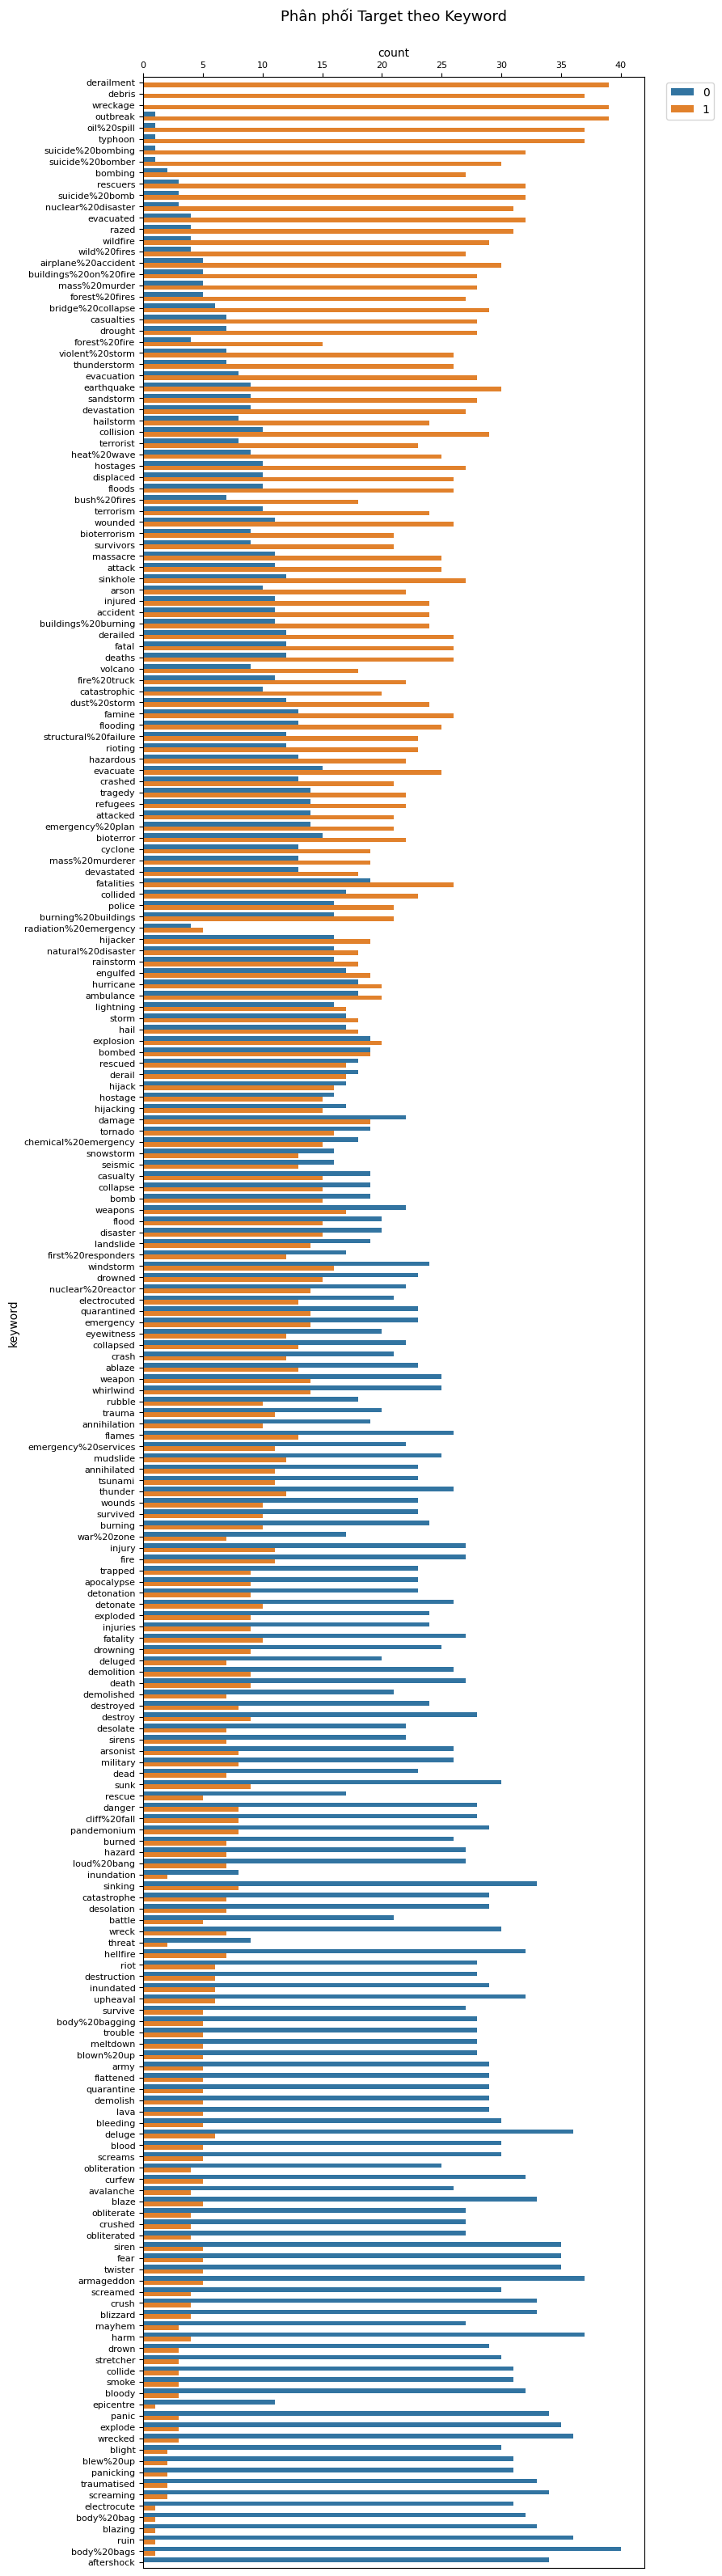

In [40]:
# Tạo thêm cột target_mean lưu giá trị trung bình của target theo keyword
df_train['target_mean'] = df_train.groupby('keyword')['target'].transform('mean')

# Vẽ biểu đồ
fig = plt.figure(figsize=(8, 40))

ax = sns.countplot(y=df_train.sort_values(by='target_mean', ascending=False)['keyword'],
              hue=df_train.sort_values(by='target_mean', ascending=False)['target'])

## Di chuyển trục x lên trên cùng
ax.xaxis.set_ticks_position('top')
ax.xaxis.set_label_position('top')

plt.tick_params(axis='x', labelsize=8)
plt.tick_params(axis='y', labelsize=8)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.title('Phân phối Target theo Keyword',fontsize=13, y=1.02)
#-----------

# Xóa cột target_mean sau khi vẽ xong
df_train.drop(columns=['target_mean'], inplace=True)

plt.show()

In [ ]:
list = []
for i in range(len(df_train[~df_train["keyword"].isna()]["keyword"])):
    if str(df_train["keyword"][i]) in str(df_train["text"][i]):
        list.append(i)

print("Số dòng mà keyword cũng nằm trong text là:", len(list))

**NHẬN XÉT:**
- Có thể thấy aftershock luôn cho ra target 0 
- deraderailment, debris và wreckage thì cho ra dữ liệu luôn là 1
- Tuy nhiên, từ trong keyword đa phần đều nằm trong text, nên đồ án này nhóm chỉ tập trung vào phần xử lý text.

## 3. Sự giống nhau giữa các text trong dữ liệu

Với các dòng có độ giống nhau giữ các cột `text` > 70% thì ta sẽ xem như hai dòng này tương đồng nhau (duplicated).

Ta có 2 vấn đề sau:
- Vấn đề 1 - `same_target`: Các dòng dữ liệu text có nội dung giống nhau, nhãn target cũng giống nhau
- Vấn đề 2 - `conflict_target`: các dòng dữ liệu text có nội dung giống nhau, nhãn target khác nhau.

In [41]:
# Remove the similar tweet
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def out_duplicate_text_with_same_loc(df, file_diff_target, file_same_target, threshold = 0.7):
# Convert the text data into a matrix of TF-IDF features
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(df['text'])

    # Calculate the cosine similarity between each pair of text data
    cosine_sim = cosine_similarity(tfidf_matrix)
 
    # Group the text data based on similarity score
    groups = {}
    for i in range(len(df)):
        group_id = None
        for j in range(i):
            if cosine_sim[i,j] > threshold and df['location'][i] == df['location'][j]:
                if group_id is None:
                    group_id = j
                elif df["target"][j] > df["target"][group_id]:
                    group_id = j
        if group_id is None:
            group_id = i
        groups.setdefault(group_id, []).append(i)
        
    diff_duplicate_df = pd.DataFrame()
    same_duplicate_df = pd.DataFrame()
    for group in groups.values():
        if(len(group) > 1):
            duplicate_df = df.iloc[group]
            # Difference target
            if duplicate_df['target'].duplicated().sum() == 0:
                diff_duplicate_df = pd.concat([diff_duplicate_df, duplicate_df])
                
            # Same target
            else:
                same_duplicate_df = pd.concat([same_duplicate_df, duplicate_df])
                
    diff_duplicate_df.to_csv(file_diff_target, index = False)
    same_duplicate_df.to_csv(file_same_target, index = False)
                
out_duplicate_text_with_same_loc(df = df_train,
                                 file_diff_target = './preprocessing/diff_target.csv',
                                 file_same_target = './preprocessing/same_target.csv')


In [43]:
diff_target_df = pd.read_csv('./preprocessing/diff_target.csv')
same_target_df = pd.read_csv('./preprocessing/same_target.csv')

In [ ]:
# # Biểu đồ tròn với số liệu phần trăm
# target_counts = diff_target_df['target'].value_counts()
# target_percentages = target_counts / target_counts.sum() * 100

# diff_target_df['target'].value_counts().plot(kind='pie', labels=['Not Disaster ({})'.format(target_counts[0]), 'Disaster ({})'.format(target_counts[1])],
#                                        autopct=lambda p: '{:.2f}%'.format(p))

# plt.title('Phân phối của target trong dữ liệu tương đồng nhau nhưng khác nhau về target')
# plt.show()

**NHẬN XÉT:** 

- Có tồn tại cả dữ liệu trùng và dữ liệu conflict trong text.
- Do đó, ta sẽ phải cân nhắc dán lại nhãn của dữ liệu bằng cách chọn 1 trong 2 dữ liệu dựa trên text của dữ liệu được cung cấp.

**Trong phần tiền xử lý:**
- Nhóm em sẽ tiến hành xóa dữ liệu trùng.
- Đồng thời, đối với dữ liệu conflict tụi em sẽ lấy nhãn có khả năng nhất làm nhãn cho text đó.